In [54]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  # To get the password without showing the input
password = getpass.getpass()

In [55]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)

In [69]:
query = '''SELECT film.film_id, film.title, film.rental_rate, film.length, film.rating FROM film 
JOIN inventory ON film.film_id = inventory.film_id 
JOIN rental ON inventory.inventory_id = rental.inventory_id;'''

In [71]:
from datetime import datetime

In [88]:
data = pd.read_sql_query(query, engine)
data.head()

,film_id,title,rental_rate,length,rating
0,1,ACADEMY DINOSAUR,0.99,86,PG
1,1,ACADEMY DINOSAUR,0.99,86,PG
2,1,ACADEMY DINOSAUR,0.99,86,PG
3,1,ACADEMY DINOSAUR,0.99,86,PG
4,1,ACADEMY DINOSAUR,0.99,86,PG


In [89]:
# Convertir la columna 'Fecha' al formato de fecha de Python
# data['rental_date'] = pd.to_datetime(data['rental_date'])

# Reemplazar la columna 'Fecha' por el mes correspondiente
# data['rental_date'] = data['rental_date'].apply(lambda x: datetime.strftime(x, '%B' '%Y'))

In [90]:
data.head ()

,film_id,title,rental_rate,length,rating
0,1,ACADEMY DINOSAUR,0.99,86,PG
1,1,ACADEMY DINOSAUR,0.99,86,PG
2,1,ACADEMY DINOSAUR,0.99,86,PG
3,1,ACADEMY DINOSAUR,0.99,86,PG
4,1,ACADEMY DINOSAUR,0.99,86,PG


In [91]:
data['rating'].value_counts()

PG-13    3585
NC-17    3293
PG       3212
R        3181
G        2773
Name: rating, dtype: int64

In [92]:
data.dtypes

film_id          int64
title           object
rental_rate    float64
length           int64
rating          object
dtype: object

In [93]:
# mask = ((data['rental_date'].dt.month == 5) & (data['rental_date'].dt.year == 2005)) | \
#       ((data['rental_date'].dt.month == 6) & (data['rental_date'].dt.year == 2005))

# Se lo copio al nuevo df
# data2 = data[mask].copy()

In [94]:
# data2.head ()

In [95]:
# data = data2

In [96]:
data.isna().sum()

film_id        0
title          0
rental_rate    0
length         0
rating         0
dtype: int64

## EDA: Correlations and Distributions

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/var/folders/23/k5r960jx4j5_kg5518sbq1hc0000gp/T/ipykernel_58521/3597185393.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=data.corr(method='pearson')  # default


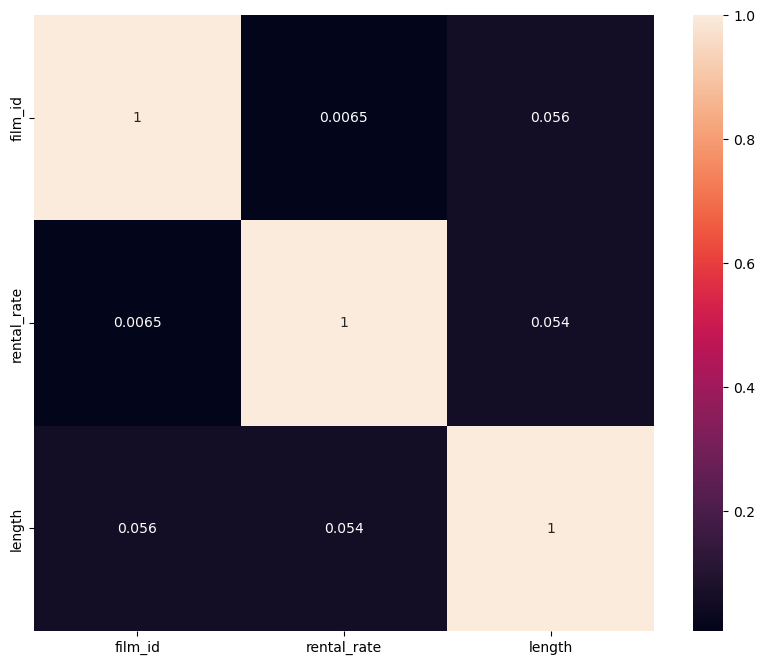

In [98]:
corr_matrix=data.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

/var/folders/23/k5r960jx4j5_kg5518sbq1hc0000gp/T/ipykernel_58521/80404813.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['rental_rate'])


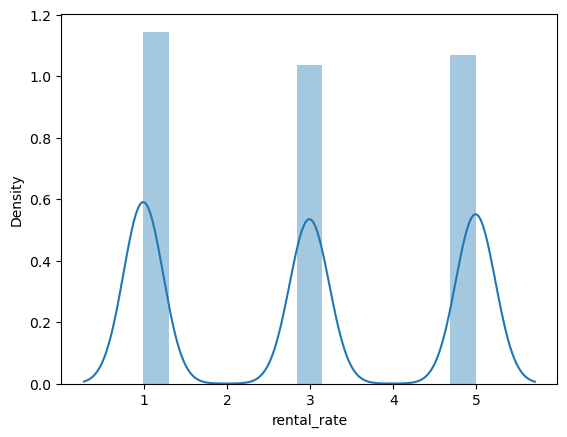

In [99]:
sns.distplot(data['rental_rate'])
plt.show()

/var/folders/23/k5r960jx4j5_kg5518sbq1hc0000gp/T/ipykernel_58521/4114287592.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['length'])


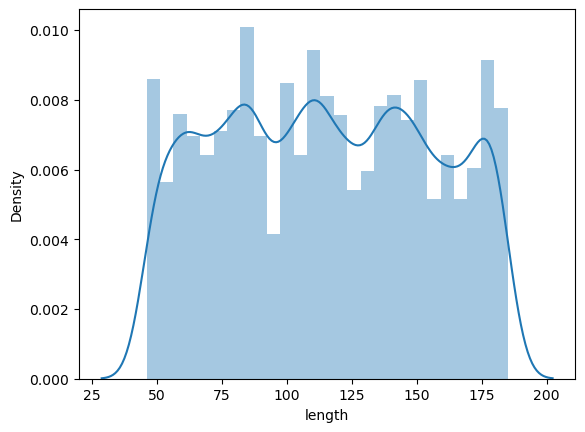

In [100]:
sns.distplot(data['length'])
plt.show()

## Pre-processing

In [101]:
from sklearn.preprocessing import Normalizer
# from sklearn.preprocessing import StandardScaler
import numpy as np
X = data.select_dtypes(include = np.number)

# Normalizing data
transformer = Normalizer().fit(X)
x_normalized = transformer.transform(X)
x = pd.DataFrame(x_normalized)

In [109]:
cat = data.select_dtypes(include = object)
cat

,title,rating
0,ACADEMY DINOSAUR,PG
1,ACADEMY DINOSAUR,PG
2,ACADEMY DINOSAUR,PG
3,ACADEMY DINOSAUR,PG
4,ACADEMY DINOSAUR,PG
...,...,...
16039,ZORRO ARK,NC-17
16040,ZORRO ARK,NC-17
16041,ZORRO ARK,NC-17
16042,ZORRO ARK,NC-17


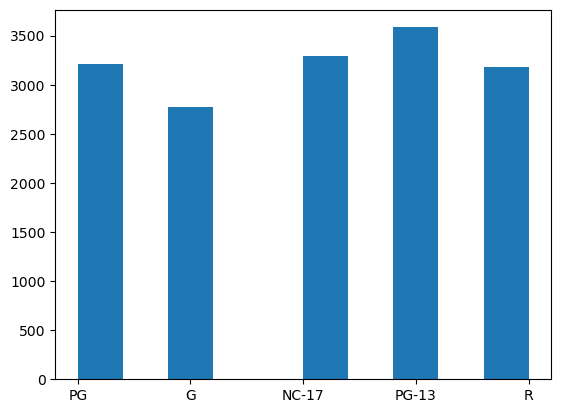

In [110]:
plt.hist(cat['rating'])
plt.show()

In [111]:
categorical = pd.get_dummies(cat, columns=['title', 'rating'])
categorical

,title_ACADEMY DINOSAUR,title_ACE GOLDFINGER,title_ADAPTATION HOLES,title_AFFAIR PREJUDICE,title_AFRICAN EGG,title_AGENT TRUMAN,title_AIRPLANE SIERRA,title_AIRPORT POLLOCK,title_ALABAMA DEVIL,title_ALADDIN CALENDAR,...,title_YOUNG LANGUAGE,title_YOUTH KICK,title_ZHIVAGO CORE,title_ZOOLANDER FICTION,title_ZORRO ARK,rating_G,rating_NC-17,rating_PG,rating_PG-13,rating_R
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16039,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
16040,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
16041,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
16042,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


### Train Test

In [112]:
query2 = '''SELECT film.film_id, film.title, rental.rental_date FROM film 
JOIN inventory ON film.film_id = inventory.film_id 
JOIN rental ON inventory.inventory_id = rental.inventory_id;'''

In [113]:
data2 = pd.read_sql_query(query2, connection_string)
# data2[''].sum()
data2

,film_id,title,rental_date
0,1,ACADEMY DINOSAUR,2005-07-08 19:03:15
1,1,ACADEMY DINOSAUR,2005-08-02 20:13:10
2,1,ACADEMY DINOSAUR,2005-08-21 21:27:43
3,1,ACADEMY DINOSAUR,2005-05-30 20:21:07
4,1,ACADEMY DINOSAUR,2005-06-17 20:24:00
...,...,...,...
16039,1000,ZORRO ARK,2005-05-29 03:49:03
16040,1000,ZORRO ARK,2005-06-15 21:50:32
16041,1000,ZORRO ARK,2005-07-12 13:24:47
16042,1000,ZORRO ARK,2005-07-31 07:32:21


In [114]:
data3 = data2[(data2['rental_date'].dt.year == 2005) & (data2['rental_date'].dt.month == 6)]

In [115]:
data3

,film_id,title,rental_date
4,1,ACADEMY DINOSAUR,2005-06-17 20:24:00
13,1,ACADEMY DINOSAUR,2005-06-21 00:30:26
17,1,ACADEMY DINOSAUR,2005-06-15 02:57:51
35,3,ADAPTATION HOLES,2005-06-15 18:17:28
46,4,AFFAIR PREJUDICE,2005-06-17 18:06:14
...,...,...,...
16016,1000,ZORRO ARK,2005-06-17 15:47:00
16020,1000,ZORRO ARK,2005-06-18 08:34:59
16025,1000,ZORRO ARK,2005-06-16 00:52:51
16033,1000,ZORRO ARK,2005-06-19 19:15:21


In [116]:
data3['rental_date'] = 0
data3

/var/folders/23/k5r960jx4j5_kg5518sbq1hc0000gp/T/ipykernel_58521/2924659017.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['rental_date'] = 0


,film_id,title,rental_date
4,1,ACADEMY DINOSAUR,0
13,1,ACADEMY DINOSAUR,0
17,1,ACADEMY DINOSAUR,0
35,3,ADAPTATION HOLES,0
46,4,AFFAIR PREJUDICE,0
...,...,...,...
16016,1000,ZORRO ARK,0
16020,1000,ZORRO ARK,0
16025,1000,ZORRO ARK,0
16033,1000,ZORRO ARK,0


In [118]:
y = data3['rental_date']
X = np.concatenate((x, categorical), axis=1)

### Train test split

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

ValueError: Found input variables with inconsistent numbers of samples: [16044, 2311]

## Modelling

In [ ]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_train, y_train)

In [ ]:
predictions = classification.predict(X_test)
classification.score(X_test, y_test)

0.007930785868781542

In [ ]:
## Check model accuracy

In [ ]:
y_test.value_counts()

TIMBERLAND SKY         6
FARGO GANDHI           6
SEATTLE EXPECATIONS    6
MOVIE SHAKESPEARE      6
METAL ARMAGEDDON       6
                      ..
REDS POCUS             1
RAGE GAMES             1
NEIGHBORS CHARADE      1
GHOST GROUNDHOG        1
RACER EGG              1
Name: title, Length: 720, dtype: int64

In [ ]:
pd.Series(predictions).value_counts()

CAMELOT VACATION      181
MALLRATS UNITED       161
EASY GLADIATOR        148
ENGLISH BULWORTH      146
VELVET TERMINATOR     129
HANDICAP BOONDOCK     129
VOYAGE LEGALLY         81
BUTTERFLY CHOCOLAT     80
TALENTED HOMICIDE      64
VIDEOTAPE ARSENIC      50
BUCKET BROTHERHOOD     38
WITCHES PANIC          32
BINGO TALENTED         27
IDOLS SNATCHERS        26
TIMBERLAND SKY         24
HOBBIT ALIEN           23
SWEET BROTHERHOOD      19
ROBBERS JOON           16
DETECTIVE VISION       12
BANGER PINOCCHIO        1
dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
classification.predict_proba(X_test)

array([[0.00085733, 0.0004052 , 0.00086749, ..., 0.00061776, 0.00059219,
        0.0008613 ],
       [0.00165815, 0.00024917, 0.00034598, ..., 0.00058082, 0.00073253,
        0.00167454],
       [0.00551211, 0.00043251, 0.00105731, ..., 0.00059534, 0.00054611,
        0.00071617],
       ...,
       [0.00076606, 0.00038855, 0.00078109, ..., 0.00062924, 0.00061938,
        0.00096186],
       [0.00396491, 0.00038598, 0.00077728, ..., 0.0006399 , 0.00063293,
        0.00101818],
       [0.00088196, 0.00092474, 0.00089332, ..., 0.00236247, 0.0006193 ,
        0.00741423]])